<a href="https://colab.research.google.com/github/sebastiao25759/Modelos-de-Machine-Learning-Metricas-de-Avaliacao-de-Desempenho/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install -q tensorflow-gpu==2.0.0-beta1
!pip install -q tensorflow==2.9.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.

In [40]:
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import roc_curve, auc
from tensorflow.math import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd


In [4]:
tf.__version__

'2.17.1'

In [5]:
%load_ext tensorboard

In [6]:
logdir = 'log'

In [13]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,2), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images,test_labels)
          )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.8773 - loss: 0.3968 - val_accuracy: 0.9788 - val_loss: 0.0679
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9804 - loss: 0.0625 - val_accuracy: 0.9851 - val_loss: 0.0461
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 31ms/step - accuracy: 0.9884 - loss: 0.0375 - val_accuracy: 0.9888 - val_loss: 0.0386
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9899 - val_loss: 0.0304
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9920 - loss: 0.0238 - val_accuracy: 0.9907 - val_loss: 0.0324


In [18]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [19]:
classes=[0,1,2,3,4,5,6,7,8,9]

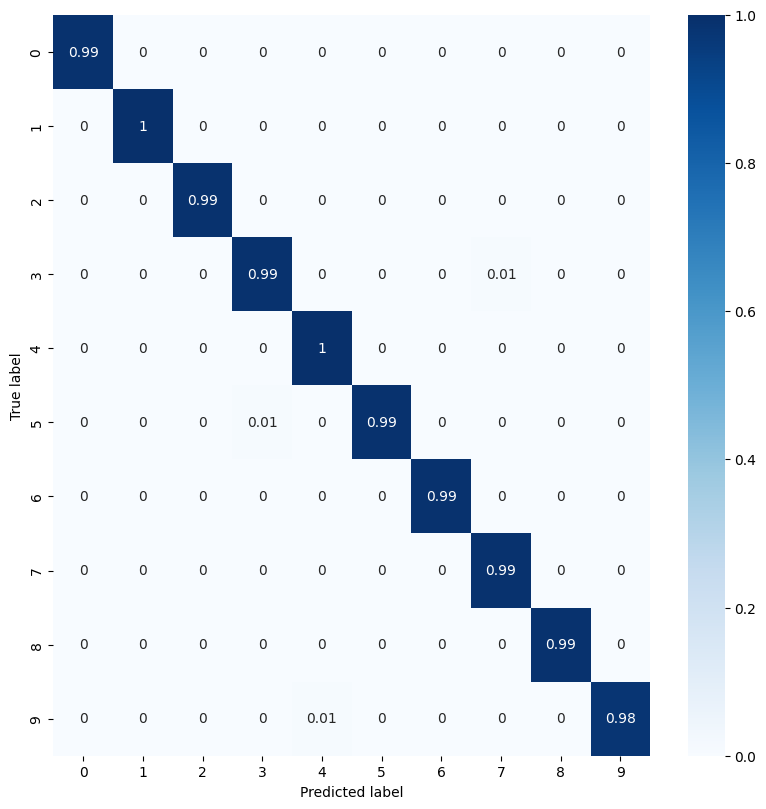

In [26]:
con_mat = confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float')/con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
cm = confusion_matrix(y_true, y_pred)

VP = np.diag(cm)
FN = cm.sum(axis=1) - VP
FP = cm.sum(axis=0) - VP
VN = cm.sum() - (FP + FN + VP)
N = len(y_true)

In [30]:
sensitivity = VP / (VP + FN)
specificity = VN / (VN + FP)
precision = VP / (VP + FP)
accuracy = (VP + VN) / N
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

In [33]:
metrics = ['Sensitivity', 'Specificity', 'Precision', 'Accuracy', 'F1 Score']
values = [
    sensitivity.mean(),
    specificity.mean(),
    precision.mean(),
    accuracy.mean(),
    f1_score.mean()
]

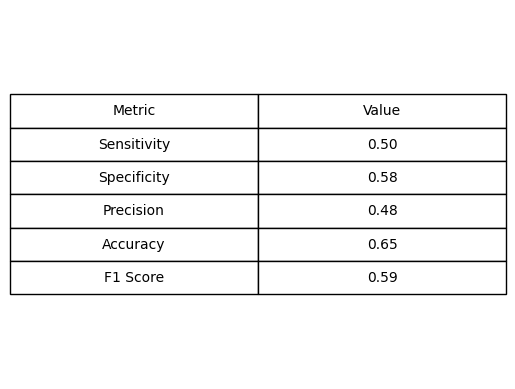

In [37]:
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')

table_data = [['Metric', 'Value']] + [[metric, f"{value:.2f}"] for metric, value in zip(metrics, values)]
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
plt.show()

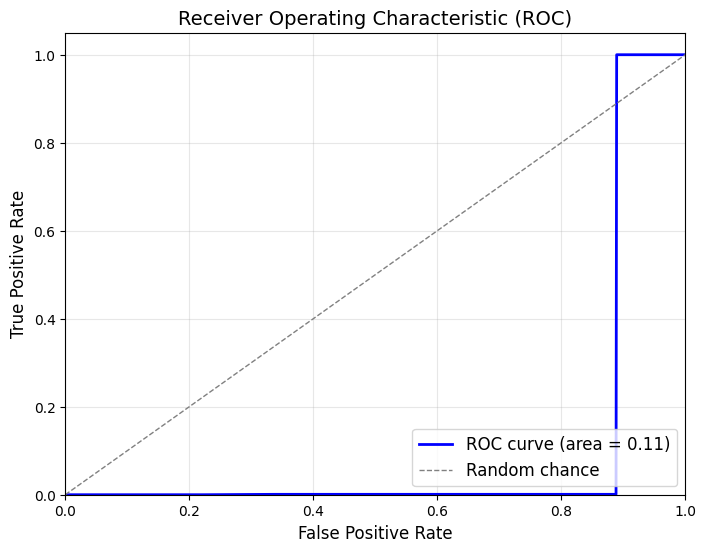

In [41]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()